<a href="https://colab.research.google.com/github/MariamSayari/AnomalyDetectionKmeansVersion1-/blob/master/Pitch_Detection_these.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install praat-parselmouth

     |████████████████████████████████| 9.0MB 3.7MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


## 1ére Méthode

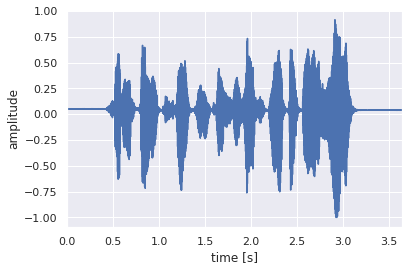

In [8]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import seaborn as sns

sns.set() # Use seaborn's default style to make attractive graphs
#snd is now a Parselmouth Sound object, and we can access its values and other properties to plot them with the common matplotlib Python library
snd = parselmouth.Sound("/content/drive/My Drive/Colab Notebooks/Emotion_detection/SAVEE_DB/anger/a01_loc01.wav") 
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

Il est également possible d'extraire une partie du fragment de discours et de le tracer séparément. Par exemple, extrayons la partie à partir 0.3 s et traçons sa forme d'onde avec une ligne plus fine.


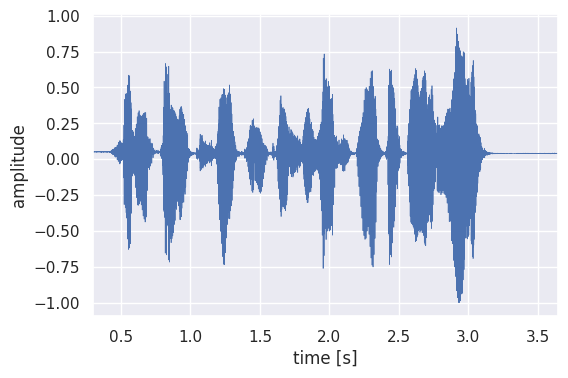

In [50]:
snd_part = snd.extract_part(from_time=0.3, preserve_times=True)
plt.figure()
plt.plot(snd_part.xs(), snd_part.values.T, linewidth=0.5)
plt.xlim([snd_part.xmin, snd_part.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

Ensuite, nous pouvons écrire quelques fonctions Python ordinaires pour tracer un Fourchelang Spectrogram et Intensity.



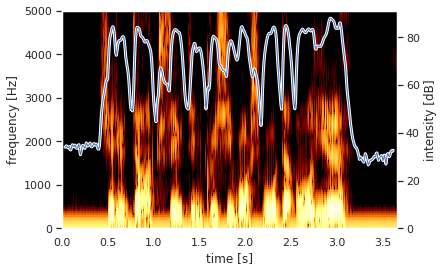

In [9]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

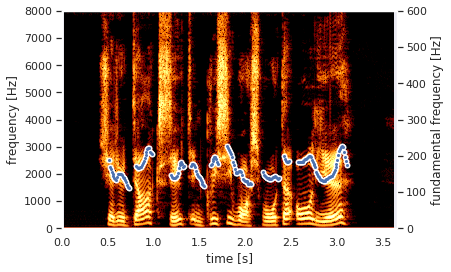

In [10]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [61]:
pitch_values

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 187.59225567, 170.41344912, 162.47439711,
       154.53714826, 148.80931857, 143.677977  , 139.9877621 ,
       136.92081766, 134.54686615, 141.55759349, 148.56675639,
       150.94033932, 150.41457371, 148.60423885, 145.72

In [20]:
!pip install scikit-fda

     |████████████████████████████████| 276kB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-fda: filename=scikit_fda-0.4-cp36-cp36m-linux_x86_64.whl size=439007 sha256=e897081978578e9c51e33b66cf86e459d93f27f2241f0bc51d479c68285f167f
  Stored in directory: /root/.cache/pip/wheels/6e/78/88/120b74918404ab3ee19adf415e5fe445649ed09d454bb8de6f
Successfully built scikit-fda
  Created wheel for findiff: filename=findiff-0.8.6-cp36-none-any.whl size=14201 sha256=132ed17db8732552b8d78f4f607afe92544d1dc919652fe72a3f838e981da13d
  Stored in directory: /root/.cache/pip/wheels/b3/bb/66/bc812df38465ecc95d4466a84edf8912d59f43ebed8db377a5
Successfully built findiff


In [29]:
from skfda import FDataGrid

import numpy as np

grid_points = np.linspace(0,3.5,num=361)
fd = FDataGrid(pitch_values, grid_points)

fd = fd[:]

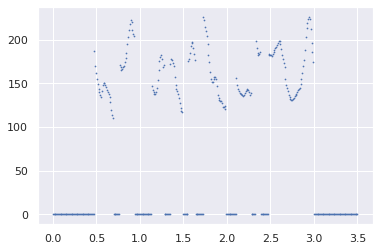

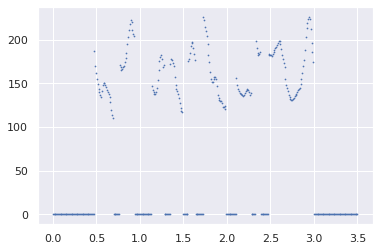

In [30]:
fd.scatter(s=0.5)

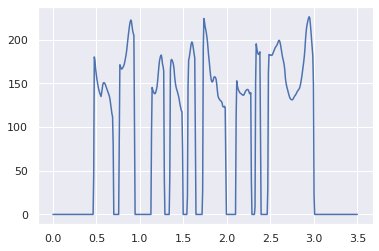

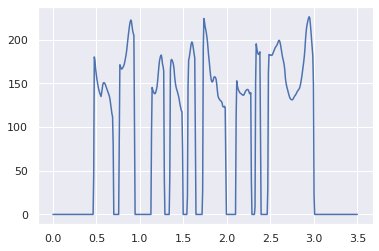

In [37]:
fd.plot()